In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
fname = "HVF_500.txt"
fp = open(fname,"r")
fl = fp.readlines()
fp.close()
z = np.double(fl[0].split()[1])
ndata = len(fl)-1
vpeak = np.zeros(ndata)
vpfnc = np.zeros(ndata)
vpfnc_err = np.zeros(ndata)
for j in range(0,ndata):
    vpeak[j] = np.double(fl[j+1].split()[0])
    vpfnc[j] = np.double(fl[j+1].split()[1])
    vpfnc_err[j] = np.double(fl[j+1].split()[2])

In [17]:
def HVF_param(log10vpeak_arr,log10A,log10vcut,alpha,beta):
    #‘’'
    #HVF parameterization
    #returns RHS of A2 from Comparat et al. 2017
    #dlog10(vpeak^3/H^3 dn/dlnvpeak)
    #------
    #vpeak_arr: array of vpeak values to calculate
    #A,log10vcut,alpha,beta: parameters of model
    #------
    #output: RHS of A2 from Comparat et al. 2017
    #‘’'
    x = (10**log10vpeak_arr)/(10**log10vcut)
    output = np.log10(10**log10A * (1+x)**(-beta) * np.exp(- x**alpha))
    return output

In [18]:
fname = "chains/vpeak.summary.txt"
fp = open(fname,"r")
fl = fp.readlines()
fp.close()
log10_A_ml = np.double(fl[0].split()[8])
log10_vcut_ml = np.double(fl[0].split()[9])
alpha_ml = np.double(fl[0].split()[10])
beta_ml = np.double(fl[0].split()[11])
print(log10_A_ml)
print(log10_vcut_ml)
print(alpha_ml)
print(beta_ml)

-0.7297183015674502
2.8803778602910435
1.1623712972613358
-1.083489846592585


<ErrorbarContainer object of 3 artists>

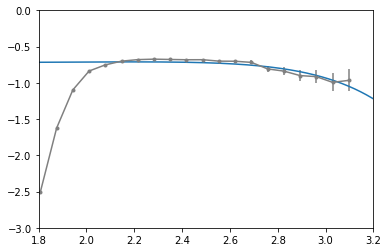

In [19]:
plt.xlim([1.8,3.2])
plt.ylim([-3.0,0.0])
vv = np.linspace(1.8,3.2,1000)
fv = HVF_param(vv,log10_A_ml, log10_vcut_ml, alpha_ml, beta_ml)
plt.plot(vv,fv)
plt.plot(vpeak,vpfnc,'.',color="0.5")
plt.errorbar(vpeak,vpfnc,yerr=vpfnc_err,color="0.5")


In [7]:
print(vpeak)

3.0972624576070777
